In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [65]:
# Carregar arquivo para um dataframe
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [66]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [67]:
# Apresentar as 10 primeiras linhas do dataframe

df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [68]:
df_exames["genero"].unique() # Verificar os valores únicos da coluna "genero"

array(['M', 'F'], dtype=object)

In [69]:
# remover coluna id_paciente

df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [70]:
# Converter uma variável categórica (genero) em numérica, usando one-hot encoding

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype="int64")

df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


In [71]:
# Criar uma feature nove
# IMC = peso (kg) / altura (m) ^2

df_exames['imc'] = df_exames['peso'] / ((df_exames['altura'] / 100) ** 2)

<Axes: >

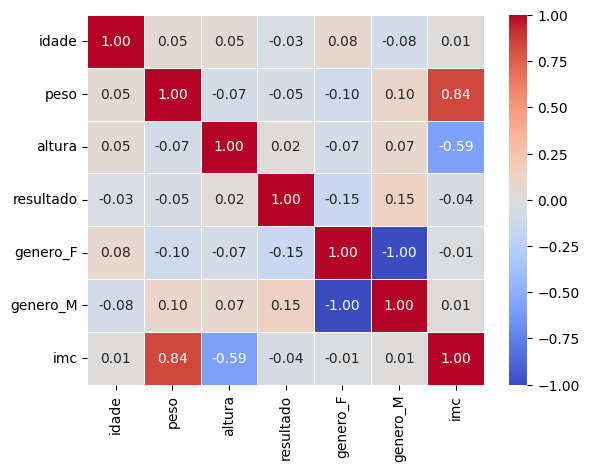

In [72]:
# Apresentar Mapa de Calor com a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, vmin=-1,vmax=1,cmap='coolwarm', fmt='.2f', linewidths=0.5)

<Axes: >

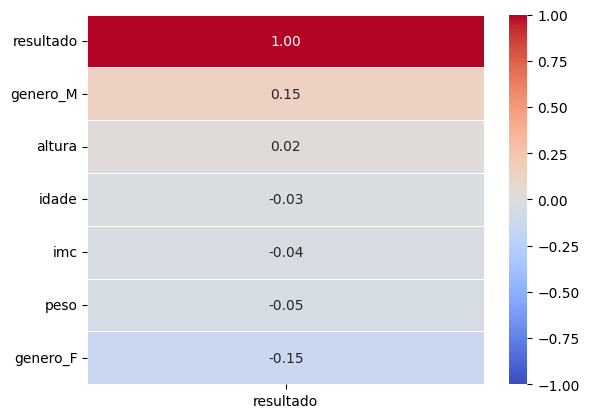

In [73]:
# Mapa de correlação só com a variáve target (resultado)
tmp = df_exames.corr()[["resultado"]].sort_values(by="resultado", ascending=False)
sns.heatmap(tmp, annot=True, vmin=-1,vmax=1,cmap='coolwarm', fmt='.2f', linewidths=0.5)



array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

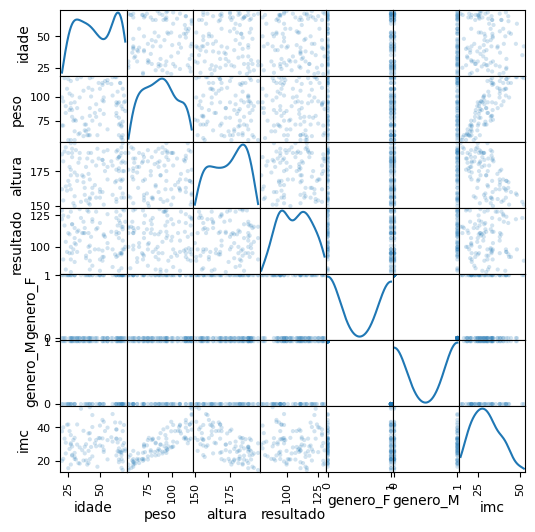

In [74]:
# Plot dee Scatter (Dispersão) com Distribuição das Variáveis
pd.plotting.scatter_matrix(df_exames, figsize=(6,6), alpha=.2, diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

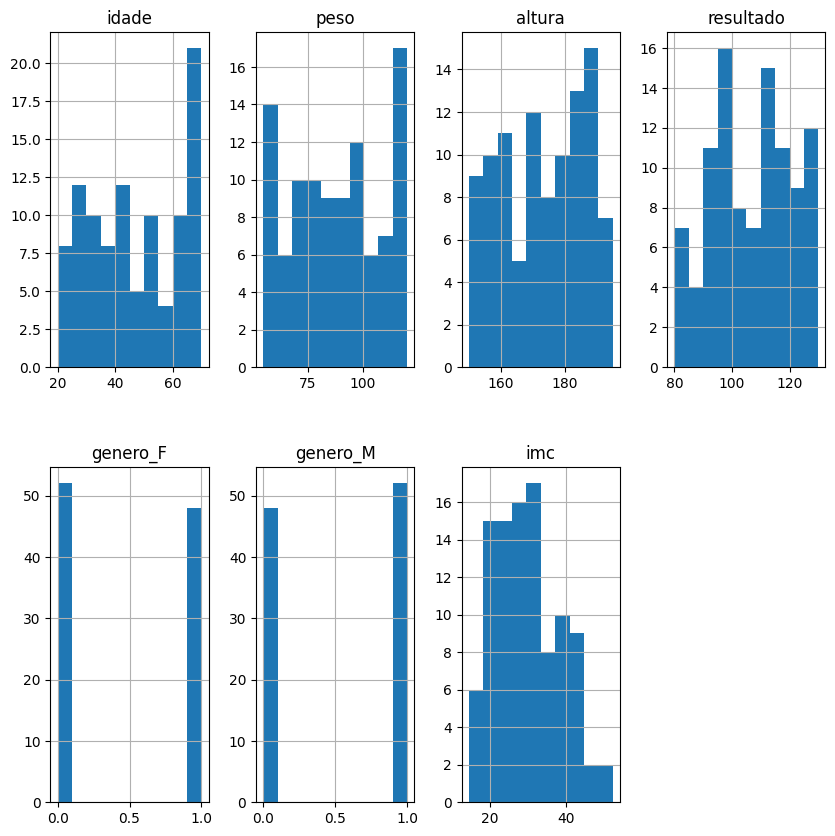

In [75]:
# Histograma de todas as variáveis
df_exames.hist(figsize=(10,10), layout=(2,4))

In [76]:
dict_regressao = {
  "tempo_casa": [1,3,6,9,10,14,18],
  "salario": [1500,3000,4500,6000,7000,8500,10_000]
}

df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

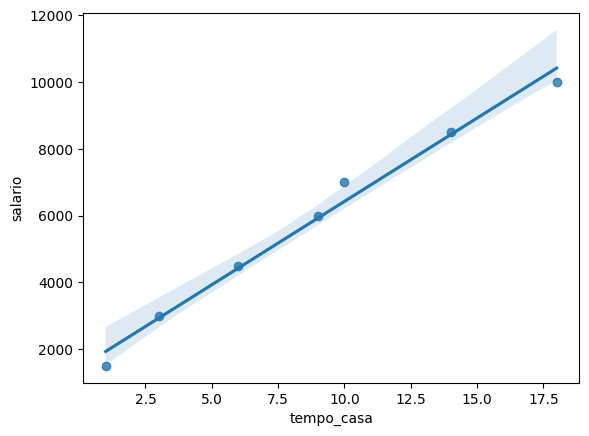

In [77]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

equação da reta: y = ax + b

In [78]:
df_exames

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
...,...,...,...,...,...,...,...
95,52,96,183,89,1,0,28.666129
96,68,108,169,105,1,0,37.813802
97,21,95,154,125,0,1,40.057345
98,41,109,173,128,0,1,36.419526


In [79]:
# Modelo 1 - sem IMC
X = df_exames.drop(columns=['resultado', 'imc'])
y = df_exames['resultado']

In [80]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [81]:
len(X_train), len(X_test), len(y_train), len(y_test)

(70, 30, 70, 30)

In [82]:
# Treinar o algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [83]:
# Gerar Predições do conjunto de testes com base no modelo 1
y_pred = model_1.predict(X_test)

In [84]:
# Equação da Reta - Regressão linear
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [85]:
model_1.intercept_

94.21133142019856

In [86]:
# R2 Score - Conjunto de treinamento
model_1.score(X_train, y_train)

0.06218388634297234

In [87]:
# R2 Score - Conjunto de testes
model_1.score(X_test, y_test)

-0.1364090447910642

In [88]:
# R2 Score - Conjunto de testes
r2_score(y_test, y_pred)

-0.1364090447910642

In [89]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.695569181179541

In [90]:
# Segundo Modelo - Apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [91]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [92]:
# Treinar o algoritmo de Regressão Linear - Modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [94]:
# Gerar Predição com base no modelo para o conjunt de testes
y_pred = model_2.predict(X_test)

In [95]:
model_2.coef_

array([-0.21677589])

In [96]:
model_2.intercept_

112.15019229088836

In [97]:
# R2 Score - Conjunto de treinamento
model_2.score(X_train, y_train)

0.015285962664806862

In [98]:
# R2 Score - Conjunto de testes
model_2.score(X_test, y_test)

-0.0889832856240178

In [99]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.505651407060103

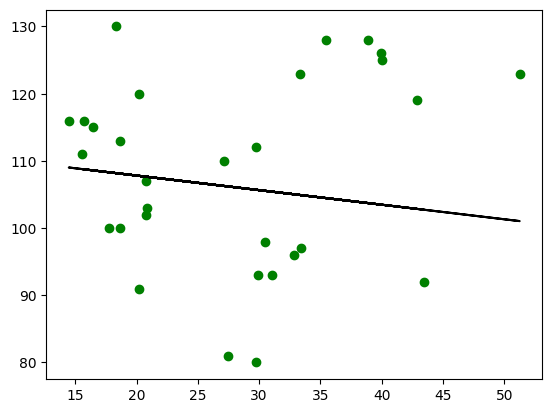

In [103]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')